(429435, 67)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

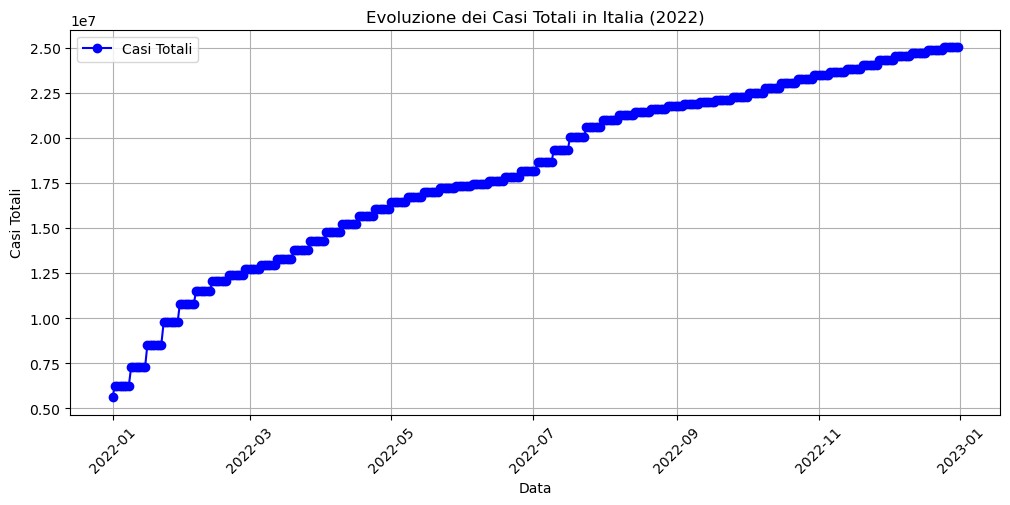

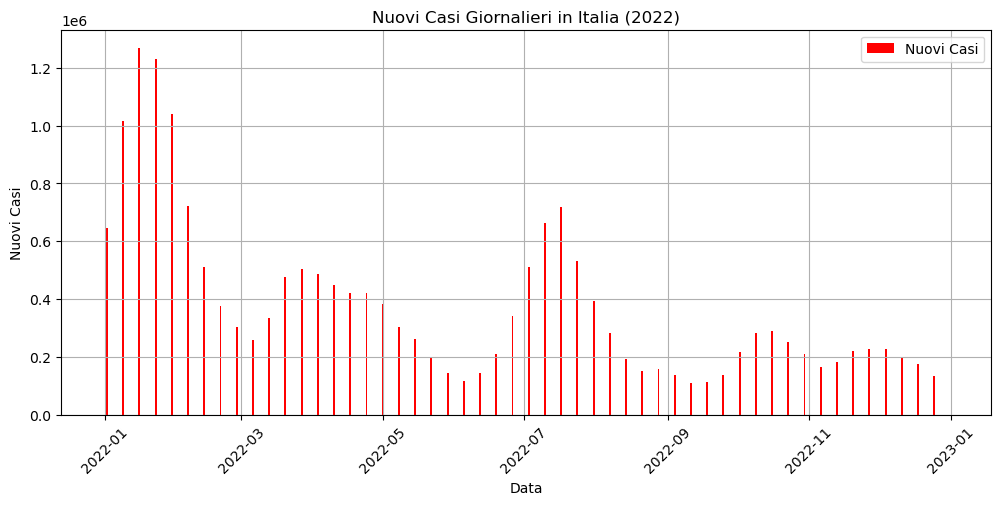

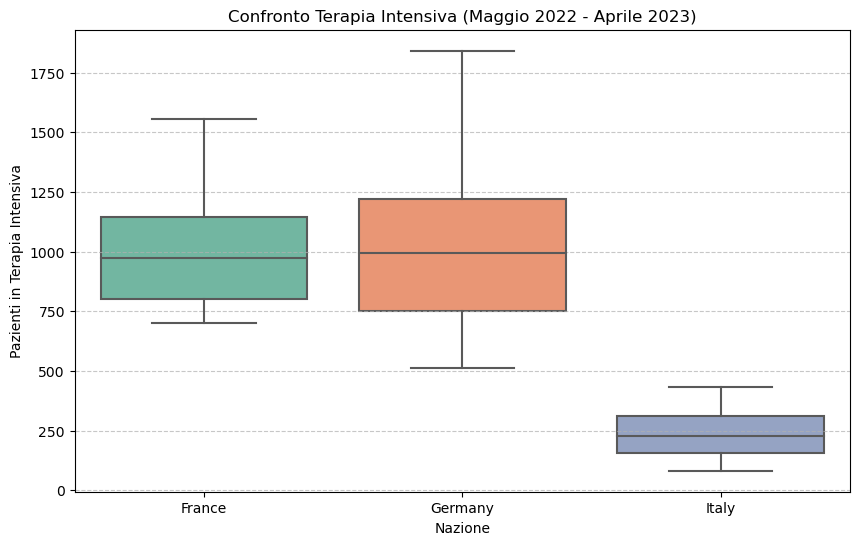

Valori nulli in 'hosp_patients': 365

Totale pazienti ospedalizzati nel 2021 per nazione:
location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


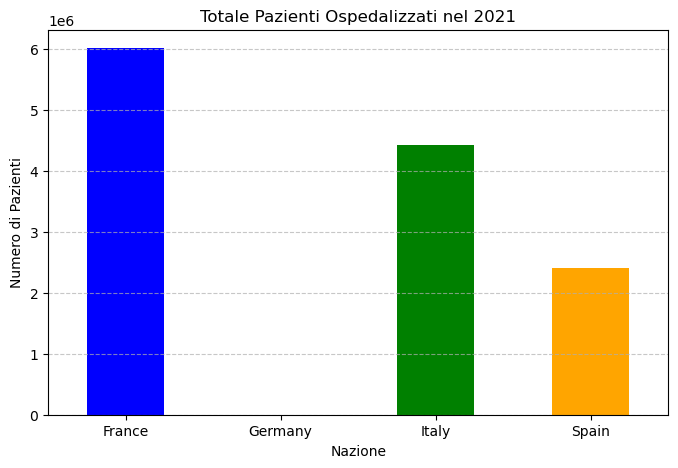

In [1]:
# ESERCIZIO 1
# Si richiede di verificare le dimensioni del dataset e i relativi metadati

# 1) Importo le librerie che mi servono
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carico il dataset con il metodo read_csv()
df = pd.read_csv(r"C:\Users\PC\Desktop\Db_Covid\owid-covid-data.csv")

df

# METADATI

# Utilizzo il metodo shape per vedere il numero di righe e colonne del dataset
print(df.shape)  

# Stampo il nome delle series
print(df.columns)

# Visualizzo il tipo di dato per ogni series
print(df.dtypes)

# Utilizzo il metodo head per mostrare le prime 5 righe del dataset
print(df.head())

# Utilizzo il metodo info per visualizzare delle informazioni generali al database
print(df.info())

# Utilizzo il metodo describe per visualizzare le statistiche descrittive del database
print(df.describe())

# ESERCIZIO 2
# Si chiede di trovare, per ogni continente:
# - il numero di casi fin dall'inizio della pandemia
# - la percentuale rispetto al totale mondiale del numero di casi

# Utilizzo il metodo dropna() per filtrare e rimuovere le eventuali righe senza info sul continente(NaN)
df = df.dropna(subset=["continent"])

# Utilizzo il metodo groupby() per calcolarmi il numero totale di casi per continente
# prendendo il valore massimo di total_cases 
continent_cases = df.groupby("continent")["total_cases"].max()

# Calcolo il totale mondiale sommando i casi di tutti i continenti
world_total_cases = continent_cases.sum()

# Calcolo la percentuale rispetto al totale globale per ogni continente
continent_cases_percentage = (continent_cases / world_total_cases) * 100

# Creo un DataFrame per stamparmi i risultati ottenuti
result = pd.DataFrame({
    "Total Cases": continent_cases,
    "Percentage of World Cases": continent_cases_percentage
})

print(result)

# ESERCIZIO 3
# Selezionare i dati relativi all'Italia nel 2022
# e poichè i nuovi casi vengono registrati settimanalmente
# filtrare i giorni via che non hanno misurazioni
# Mostrare con dei grafici adeguati:
# - l'evoluzione dei casi totali dall'inizio alla fine dell'anno
# - il numero di nuovi casi rispetto alla data

# Carico il dataset "parsandolo" in date
df = pd.read_csv((r"C:\Users\PC\Desktop\Db_Covid\owid-covid-data.csv"), parse_dates=["date"])

# Filtro i dati per l'Italia nel 2022
italy_2022 = df[(df["location"] == "Italy") & (df["date"].dt.year == 2022)]

# Rimuovo i giorni senza misurazioni (valori NaN in new_cases)
italy_2022 = italy_2022.dropna(subset=["new_cases"])

# Grafico 1: Evoluzione dei casi totali
plt.figure(figsize=(12, 5))
plt.plot(italy_2022["date"], italy_2022["total_cases"], marker="o", linestyle="-", color="blue", label="Casi Totali")
plt.xlabel("Data")
plt.ylabel("Casi Totali")
plt.title("Evoluzione dei Casi Totali in Italia (2022)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Grafico 2: Nuovi casi giornalieri
plt.figure(figsize=(12, 5))
plt.bar(italy_2022["date"], italy_2022["new_cases"], color="red", label="Nuovi Casi")
plt.xlabel("Data")
plt.ylabel("Nuovi Casi")
plt.title("Nuovi Casi Giornalieri in Italia (2022)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()

# ESERCIZIO 4
# Riguardo le nazioni di Italia, Germania, Francia:
# - mostrare in un boxplot la differenza tra queste nazioni
# riguardo il numero di pazienti in terapia intensiva
# considerare la colonna (icu_patients) da maggio 2022 incluso ad aprile 2023 incluso 
# - scrivere un breve commento riguardo che conclusioni possiamo trarre osservando il grafico

# Filtro i dati per Italia, Germania e Francia nel periodo richiesto
countries = ["Italy", "Germany", "France"]
df_filtered = df[(df["location"].isin(countries)) & 
                 (df["date"] >= "2022-05-01") & 
                 (df["date"] <= "2023-04-30")]

# Rimuovo i valori NaN nella colonna icu_patients
df_filtered = df_filtered.dropna(subset=["icu_patients"])

# Creo il boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="location", y="icu_patients", data=df_filtered, palette="Set2")

# Personalizzo il grafico
plt.xlabel("Nazione")
plt.ylabel("Pazienti in Terapia Intensiva")
plt.title("Confronto Terapia Intensiva (Maggio 2022 - Aprile 2023)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostro il grafico
plt.show()

#INTERPRETAZIONE E CONCLUSIONI RISPETTO AL GRAFICO OTTENUTO

# Il boxplot mostra la mediana e la variabilità del numero di pazienti 
# in terapia intensiva per ciascun paese

# La lunghezza della scatola indica la variabilità dei dati 
# mentre i punti fuori dalla scatola sono valori anomali

# Se un paese ha una mediana più alta
# significa che ha avuto più pazienti in terapia intensiva rispetto agli altri

# Se un box è molto stretto, indica che il numero di pazienti 
# in terapia intensiva è stato più stabile nel tempo

# Se un box è più alto o ha "outlier"
# ovvero che ci sono stati momenti con un alto numero di pazienti in terapia intensiva


# ESERCIZIO 5
# Riguardo le nazioni Italia, Germania, Francia e Spagna in tutto il 2021:
# - mostrare in maniera grafica o numerica la somma dei pazienti ospitalizzati (hosp_patients)
# - se ci sono dati nulli scrivere un commento se possono essere gestiti o sostituiti

# Filtro i dati per le nazioni richieste e per l'anno 2021
countries = ["Italy", "Germany", "France", "Spain"]
df_filtered = df[(df["location"].isin(countries)) & (df["date"].dt.year == 2021)]

# Controllo i valori nulli nella colonna hosp_patients
missing_values = df_filtered["hosp_patients"].isna().sum()
print(f"Valori nulli in 'hosp_patients': {missing_values}")

# Sommo i pazienti ospedalizzati per nazione
hosp_totals = df_filtered.groupby("location")["hosp_patients"].sum()

# Visualizzo i risultati numericamente
print("\nTotale pazienti ospedalizzati nel 2021 per nazione:")
print(hosp_totals)

# Grafico a barre
plt.figure(figsize=(8, 5))
hosp_totals.plot(kind="bar", color=["blue", "red", "green", "orange"])
plt.title("Totale Pazienti Ospedalizzati nel 2021")
plt.xlabel("Nazione")
plt.ylabel("Numero di Pazienti")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostro il grafico
plt.show()

#INTERPRETAZIONE E CONCLUSIONI RISPETTO AL GRAFICO OTTENUTO
# Il grafico a barre mostra il totale de pazienti ospedalizzati per ogni nazione nel 2021

# Se una nazione ha un valore molto più alto
# significa che ha avuto più ricoveri rispetto alle altre

# Da sottolineare il dato nullo della Germania rispetto alle altre nazioni